
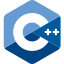
<br>

<div style="text-align:center; font-size:200%;">
 <b>Einführung in die Fehlerbehandlung</b>
</div>
<br/>
<div style="text-align:center; font-size:120%;">Dr. Matthias Hölzl</div>
<br/>
<div style="text-align:center;">Coding-Akademie München</div>
<br/>
<!-- 01 Einführung in die Fehlerbehandlung.ipynb -->
<!-- slides/module_180_error_handling/topic_110_intro_error_handling.cpp -->


# Fehlerbehandlung

Wir wollen eine Funktion `int int_sqrt(int n)` schreiben, die die
"Ganzzahlige Wurzel" berechnet:
- Wenn `n` eine Quadratzahl ist, also die Form `m * m` hat, dann soll `m`
  zurückgegeben werden.
- Was machen wir, falls `n` keine Quadratzahl ist?
- Um Exceptions zu motivieren, besprechen wir erst zwei andere Möglichkeiten
  Fehler zu behandeln


- Wir können versuchen, einen "Fehlerwert" zurückzugeben, der kein gültiges
  Ergebnis ist.
- Hier z.B. eine negative Zahl

In [ ]:
constexpr int error_value{-1};

In [ ]:
int int_sqrt_with_negative_value(int n) {
    for (int m = 0; m <= n; ++m) {
        if (m * m == n) {
            return m;
        }
    }
    return error_value;
}

In [ ]:
int_sqrt_with_negative_value(9)

In [ ]:
int_sqrt_with_negative_value(8)


- Diese Version ist einfach zu verwenden, aber fehleranfällig:

In [ ]:
#include <iostream>

void print_int_sqrt_1(int n)
{
    int root{int_sqrt_with_negative_value(n)};
    std::cout << "The root of " << n << " is " << root << ".\n";
}

In [ ]:
print_int_sqrt_1(9)

In [ ]:
print_int_sqrt_1(8)


- Code zur Fehlerbehandlung ist mit dem "Erfolgsfall" verwoben

In [ ]:
void print_int_sqrt_1_with_error_check(int n)
{
    int root{int_sqrt_with_negative_value(n)};
    if (root == error_value) {
        std::cout << n << " does not have a root!\n";
    } else {
        std::cout << "The root of " << n << " is " << root << ".\n";
    }
}

In [ ]:
print_int_sqrt_1_with_error_check(9)

In [ ]:
print_int_sqrt_1_with_error_check(8)


- Wir können auch zwei Werte zurückgeben: Ergebnis und ein Erfolg/Fehler Flag

In [ ]:
#include <tuple>

In [ ]:
std::tuple<int, bool> int_sqrt_with_pair(int n) {
    for (int m = 0; m <= n; ++m) {
        if (m * m == n) {
            return {m, true};
        }
    }
    return {0, false};
}

In [ ]:
auto result{int_sqrt_with_pair(9)};

In [ ]:
std::get<0>(result)

In [ ]:
std::get<1>(result)

In [ ]:
auto result{int_sqrt_with_pair(8)};

In [ ]:
std::get<0>(result)

In [ ]:
std::get<1>(result)


- Die Probleme bei dieser Lösung sind ähnlich wie bei der vorhergehenden.

In [ ]:
void print_int_sqrt_2(int n) {
    auto [root, is_valid] = int_sqrt_with_pair(n);
    if (is_valid) {
        std::cout << "The root of " << n << " is " << root << ".\n";
    } else {
        std::cout << n << " does not have a root!\n";
    }
}

In [ ]:
print_int_sqrt_2(9)

In [ ]:
print_int_sqrt_2(8)


 Beide Ansätze haben mehrere Probleme:
 - Die Fehlerbehandlung ist optional. Wird sie nicht durchgeführt, so wird
   mit einem falschen Wert weitergerechnet.
 - Kann der Aufrufer den Fehler nicht selber behandeln, so muss der Fehler
   über mehrere Ebenen von Funktionsaufrufen "durchgereicht" werden.
 - Das führt zu unübersichtlichem Code, da der "interessante" Pfad nicht vom
   Code zur Fehlerbehandlung getrennt ist.


## Gewünschte Eigenschaften

- Normale Programmlogik wird nicht beeinträchtigt
- Behandlung von Fehlern wird erzwungen
- Entdecken eines Fehlers ist entkoppelt von seiner Behandlung
- Information über den Fehler kann leicht zum Handler kommuniziert werden